In [1]:
PATH = '/home/g056122/FeatExt_Data_Clustering/final_github/collaborative_filtering/'

In [2]:
DATAPATH = '/home/g056122/ISG_studienarbeit/Movielens_100K'

In [3]:
# import required libraries
import pandas as pd
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import silhouette_samples
import pickle

In [4]:
# import user data
dfusers = pd.read_csv(f"{DATAPATH}/u.user", sep='|', header=None, engine='python', encoding='latin-1')
dfusers.columns = ['userId', 'age', 'gender', 'occupation', 'zipcode']

In [5]:
dfusers.head()

,userId,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
# encode users dataset
categorylist=['age', 'gender', 'occupation', 'zipcode']
n_dfusers = pd.get_dummies(dfusers, columns=categorylist)

In [7]:
n_dfusers.head()

,userId,age_7,age_10,age_11,age_13,age_14,age_15,age_16,age_17,age_18,...,zipcode_N2L5N,zipcode_N4T1A,zipcode_R3T5K,zipcode_T8H1N,zipcode_V0R2H,zipcode_V0R2M,zipcode_V1G4L,zipcode_V3N4P,zipcode_V5A2B,zipcode_Y1A6B
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
n_dfusers.describe()

,userId,age_7,age_10,age_11,age_13,age_14,age_15,age_16,age_17,age_18,...,zipcode_N2L5N,zipcode_N4T1A,zipcode_R3T5K,zipcode_T8H1N,zipcode_V0R2H,zipcode_V0R2M,zipcode_V1G4L,zipcode_V3N4P,zipcode_V5A2B,zipcode_Y1A6B
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,...,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,472.000000,0.001060,0.001060,0.001060,0.005302,0.003181,0.006363,0.005302,0.014846,0.019088,...,0.001060,0.001060,0.001060,0.002121,0.001060,0.001060,0.001060,0.001060,0.001060,0.001060
std,272.364951,0.032564,0.032564,0.032564,0.072662,0.056343,0.079554,0.072662,0.121001,0.136907,...,0.032564,0.032564,0.032564,0.046029,0.032564,0.032564,0.032564,0.032564,0.032564,0.032564
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,236.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,472.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,707.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,943.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# drop userId feature from dataset
n_dfusers = n_dfusers.drop('userId', axis=1)

In [10]:
# Elbow curve to find optimal K
cost = []
K = range(1, 10)
for num_clusters in list(K):
    kmodes = KModes(n_clusters=num_clusters, init="Huang")
    labels = kmodes.fit_predict(n_dfusers)
    cost.append(kmodes.cost_)

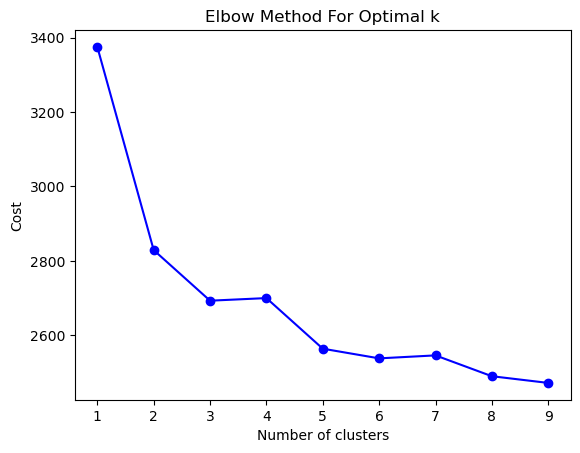

In [11]:
# plot elbow method
plt.plot(K, cost, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.savefig('categ_cluster_elbow_method.jpg')